In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv(r'C:\python\Tax model\2014.csv')
data.head()

,statefips,state,zipcode,agi_stub,n1,mars1,mars2,mars4,prep,n2,...,a10300,n85530,a85530,n85300,a85300,n11901,a11901,n11902,a11902,year
0,1,AL,0,1,850050,481840,115070,240450,479900,1401930,...,324575,0,0,0,0,62690,47433,744910,1964826,2014
1,1,AL,0,2,491370,200750,150290,125560,281350,1016010,...,950446,0,0,0,0,70780,101969,413790,1177400,2014
2,1,AL,0,3,259540,75820,142970,34070,156720,589190,...,1319641,0,0,0,0,62170,132373,192050,538160,2014
3,1,AL,0,4,164840,26730,125410,10390,99750,423300,...,1394913,0,0,0,0,45120,124048,115470,375882,2014
4,1,AL,0,5,203650,18990,177070,5860,122670,565930,...,3655700,610,135,270,66,81180,387298,114380,448442,2014


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166686 entries, 0 to 166685
Columns: 128 entries, statefips to year
dtypes: int64(127), object(1)
memory usage: 162.8+ MB


In [38]:
list(data.columns)

['statefips',
 'state',
 'zipcode',
 'agi_stub',
 'n1',
 'mars1',
 'mars2',
 'mars4',
 'prep',
 'n2',
 'numdep',
 'total_vita',
 'vita',
 'tce',
 'a00100',
 'n02650',
 'a02650',
 'n00200',
 'a00200',
 'n00300',
 'a00300',
 'n00600',
 'a00600',
 'n00650',
 'a00650',
 'n00700',
 'a00700',
 'n00900',
 'a00900',
 'n01000',
 'a01000',
 'n01400',
 'a01400',
 'n01700',
 'a01700',
 'schf',
 'n02300',
 'a02300',
 'n02500',
 'a02500',
 'n26270',
 'a26270',
 'n02900',
 'a02900',
 'n03220',
 'a03220',
 'n03300',
 'a03300',
 'n03270',
 'a03270',
 'n03150',
 'a03150',
 'n03210',
 'a03210',
 'n03230',
 'a03230',
 'n03240',
 'a03240',
 'n04470',
 'a04470',
 'a00101',
 'n18425',
 'a18425',
 'n18450',
 'a18450',
 'n18500',
 'a18500',
 'n18300',
 'a18300',
 'n19300',
 'a19300',
 'n19700',
 'a19700',
 'n04800',
 'a04800',
 'n05800',
 'a05800',
 'n09600',
 'a09600',
 'n05780',
 'a05780',
 'n07100',
 'a07100',
 'n07300',
 'a07300',
 'n07180',
 'a07180',
 'n07230',
 'a07230',
 'n07240',
 'a07240',
 'n07220',

In [39]:
tax_data = data[['a00200', 'a00300', 'a00600', 'a02650', 'a06500', 'a07180', 'a10300', 'mars1', 'mars2', 'mars4', 'agi_stub']]
tax_data.head()

,a00200,a00300,a00600,a02650,a06500,a07180,a10300,mars1,mars2,mars4,agi_stub
0,8746419,64688,72642,11187657,157928,2768,324575,481840,115070,240450,1
1,14494884,69421,96100,17836190,850897,16078,950446,200750,150290,125560,2
2,12316371,69005,123290,16117661,1236058,9554,1319641,75820,142970,34070,3
3,10817987,62269,126688,14422811,1323173,8450,1394913,26730,125410,10390,4
4,20155298,141176,368076,27664725,3501461,11284,3655700,18990,177070,5860,5


 To calculate the tax payable for a single filer, i will applied tax rate to each portion of the taxable income that falls within each tax bracket, and then add up the results. For example, if a single filer had a taxable income of $50,000 in 2015, the tax payable would be:
* 10% of ($9,225 - $0) = $922.50
15% of ($37,450 - $9,226) = $4,233.60
* 25% of ($50,000 - $37,451) = $3,137.25
Total tax payable = $922.50 + $4,233.60 + $3,137.25 = $8,293.35



The effective tax rate would be the ratio of tax payable to total income, which is the sum of all income sources before
deductions and exemptions. The average tax rate would be the ratio of tax payable to taxable income, which is the amount of income that is subject to tax after
deductions and exemptions. For example, if a single filer had a total income of $60,000 and a taxable income of $50,000 in 2015, the effective tax rate would be:
* Effective tax rate = ($8,293.35 / $60,000)
*100% = 13.82% 
* 
The average tax rate would be:
* Average tax rate = ($8,293.35 / $50,000)
*100% = 16.59%

﻿

To calculate the tax payable, i found the tax brackets and rates for the year 2015, which can be found on the IRS website. For example, for single filers, the tax brackets and rates for 2015 were:
* 10% on taxable income from $0 to $9,225
* 15% on taxable income from $9,226 to $37,450
* 25% on taxable income from $37,451 to $90,750
* 28% on taxable income from $90,751 to $189,300
* 33% on taxable income from $189,301 to $411,500
* 35% on taxable income from $411,501 to $413,200
* 39.6% on taxable income over $413,200

﻿
This is what i did:

* Created a new column called 'taxable income' that calculates the taxable income based on the existing columns and the tax rules for 2015. I applied the standard deduction and personal exemption for each filing status, and account for the different AGI categories. For example, for single filers, the standard deduction was $6,300 and the personal exemption was $4,000 in 2015.:

﻿

To finish the function to calculate the tax payable, i used conditional statements and arithmetic operations to apply the appropriate tax rate to each portion of the taxable income that falls within each tax bracket, and then add up the results. For example, for single filers, the tax brackets and rates for 2015 were:
* 10% on taxable income from $0 to $9,225
* 15% on taxable income from $9,226 to $37,450
* 25% on taxable income from $37,451 to $90,750
* 28% on taxable income from $90,751 to $189,300
* 33% on taxable income from $189,301 to $411,500
 

 The columns mars1, mars2, mars3 and agi_stub are variables used by the IRS to classify tax returns by filing status and adjusted gross income (AGI) category. According to the documentation of the IRS SOI program1, mars1 indicates single filers, mars2 indicates joint filers, mars3 indicates married filing separately, and mars4 indicates head of household. AGI is defined as gross income minus adjustments to income, and it is used to determine the taxable income and eligibility for certain deductions and credits. AGI category or agi_stub is a variable that groups tax returns by six ranges of AGI, as follows:

* 1 = $1 under $25,000
* 2 = $25,000 under $50,000
* 3 = $50,000 under $75,000
* 4 = $75,000 under $100,000
* 5 = $100,000 under $200,000
* 6 = $200,000 or more

In [ ]:
tax_data.columns = ['salaries', 'taxable_int', 'ord_dividend', 'total_income', 'income_t_before_credits', 'child_t_credit', 'taxable_income', 'mars1', 'mars2', 'mars4', 'agi_stub']
tax_data

In [ ]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166686 entries, 0 to 166685
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   salaries                 166686 non-null  int64
 1   taxable_int              166686 non-null  int64
 2   ord_dividend             166686 non-null  int64
 3   total_income             166686 non-null  int64
 4   income_t_before_credits  166686 non-null  int64
 5   child_t_credit           166686 non-null  int64
 6   taxable_income           166686 non-null  int64
 7   mars1                    166686 non-null  int64
 8   mars2                    166686 non-null  int64
 9   mars4                    166686 non-null  int64
 10  agi_stub                 166686 non-null  int64
dtypes: int64(11)
memory usage: 14.0 MB


In [ ]:
tax_data.isnull().sum()

salaries                   0
taxable_int                0
ord_dividend               0
total_income               0
income_t_before_credits    0
child_t_credit             0
taxable_income             0
mars1                      0
mars2                      0
mars4                      0
agi_stub                   0
dtype: int64

In [ ]:
tax_data.describe()

,salaries,taxable_int,ord_dividend,total_income,income_t_before_credits,child_t_credit,taxable_income,mars1,mars2,mars4,agi_stub
count,1.666860e+05,1.666860e+05,1.666860e+05,1.666860e+05,1.666860e+05,166686.000000,1.666860e+05,1.666860e+05,1.666860e+05,1.666860e+05,166686.00000
mean,7.974794e+04,9.230652e+02,2.695519e+03,1.188258e+05,1.599342e+04,40.169888,1.702214e+04,8.111580e+02,6.363983e+02,2.593464e+02,3.50000
std,1.618098e+06,3.242897e+04,8.978096e+04,2.625847e+06,5.029738e+05,825.439917,5.285354e+05,2.130567e+04,1.143777e+04,6.927230e+03,1.70783
min,0.000000e+00,-1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.00000
25%,2.716000e+03,1.000000e+01,0.000000e+00,4.110000e+03,2.220000e+02,0.000000,2.810000e+02,0.000000e+00,4.000000e+01,0.000000e+00,2.00000
50%,9.976000e+03,7.000000e+01,1.260000e+02,1.504850e+04,1.064000e+03,0.000000,1.290000e+03,6.000000e+01,1.100000e+02,2.000000e+01,3.50000
75%,4.130075e+04,3.010000e+02,6.560000e+02,5.878700e+04,4.782750e+03,21.000000,5.240000e+03,3.000000e+02,3.900000e+02,8.000000e+01,5.00000
max,2.771546e+08,7.618779e+06,1.988279e+07,5.360666e+08,1.205138e+08,116722.000000,1.266982e+08,4.292060e+06,1.611640e+06,1.104160e+06,6.00000


In [ ]:
tax_data.columns

Index(['salaries', 'taxable_int', 'ord_dividend', 'total_income',
       'income_t_before_credits', 'child_t_credit', 'taxable_income', 'mars1',
       'mars2', 'mars4', 'agi_stub'],
      dtype='object')

* Creating a new column called 'taxable income' that calculates the taxable income based on the existing columns and the tax rules for 2015. I applied the standard deduction and personal exemption for each filing status, and account for the different AGI categories. For example, for single filers, the standard deduction was $6,300 and the personal exemption was $4,000 in 2015.

In [ ]:
def calculate_taxable_income(row):
    # filing status from the MARS columns
    if row['mars1'] == 1:
        filing_status = 'single'
    elif row['mars2'] == 1:
        filing_status = 'joint'
    elif row['mars4'] == 1:
        filing_status = 'head'
    else:
        filing_status = 'other'

    # AGI category from the agi_stub column
    agi_category = row['agi_stub']

    # total income from the total_incomecolumn
    total_income = row['total_income']

    # standard deduction and personal exemption for each filing status
    if filing_status == 'single':
        taxable_income = total_income - 6300 - 4000
    elif filing_status == 'joint':
        taxable_income = total_income - 12600 - 8000
    elif filing_status == 'head':
        taxable_income = total_income - 9250 - 4000
    else:
        taxable_income = total_income - 6300 - 4000

    # AGI category limits for each filing status
    if filing_status == 'single':
        if agi_category == 1:
            taxable_income = min(taxable_income, 9225)
        elif agi_category == 2:
            taxable_income = min(taxable_income, 37450)
        elif agi_category == 3:
            taxable_income = min(taxable_income, 90750)
        elif agi_category == 4:
            taxable_income = min(taxable_income, 189300)
        elif agi_category == 5:
            taxable_income = min(taxable_income, 411500)
        elif agi_category == 6:
            taxable_income = min(taxable_income, 413200)

    elif filing_status == 'joint':
        if agi_category == 1:
                taxable_income = min(taxable_income, 18450)
        elif agi_category == 2:
                taxable_income = min(taxable_income, 74900)
        elif agi_category == 3:
                taxable_income = min(taxable_income, 151200)
        elif agi_category == 4:
                taxable_income = min(taxable_income, 230450)
        elif agi_category == 5:
                taxable_income = min(taxable_income, 411500)
        elif agi_category == 6:
                taxable_income = min(taxable_income, 464850)

    elif filing_status == 'head':
        if agi_category == 1:
                taxable_income = min(taxable_income, 13150)
        elif agi_category == 2:
                taxable_income = min(taxable_income, 50200)
        elif agi_category == 3:
                taxable_income = min(taxable_income, 129600)
        elif agi_category == 4:
                taxable_income = min(taxable_income, 209850)
        elif agi_category == 5:
                taxable_income = min(taxable_income, 411500)
        elif agi_category == 6:
                taxable_income = min(taxable_income, 439000)

    return taxable_income

In [ ]:
tax_data["taxable income"] = tax_data.apply(calculate_taxable_income, axis=1)
tax_data

C:\Users\user\AppData\Local\Temp\ipykernel_10712\1794132803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tax_data["taxable income"] = tax_data.apply(calculate_taxable_income, axis=1)


,salaries,taxable_int,ord_dividend,total_income,income_t_before_credits,child_t_credit,taxable_income,mars1,mars2,mars4,agi_stub,taxable income
0,8746419,64688,72642,11187657,157928,2768,324575,481840,115070,240450,1,11177357
1,14494884,69421,96100,17836190,850897,16078,950446,200750,150290,125560,2,17825890
2,12316371,69005,123290,16117661,1236058,9554,1319641,75820,142970,34070,3,16107361
3,10817987,62269,126688,14422811,1323173,8450,1394913,26730,125410,10390,4,14412511
4,20155298,141176,368076,27664725,3501461,11284,3655700,18990,177070,5860,5,27654425
...,...,...,...,...,...,...,...,...,...,...,...,...
166681,172125,670,2076,214306,12658,54,14648,3320,1410,870,2,204006
166682,172041,686,2318,224246,19283,42,21071,1530,1660,320,3,213946
166683,173790,688,2237,225693,23247,71,24766,780,1660,130,4,215393
166684,288787,2586,8381,427592,56274,133,60128,540,2530,110,5,417292


* Creating a new column called 'tax_payable' that calculates the tax payable based on the existing columns and the tax rules for 2015. I applied the tax brackets and rates for each filing status and AGI category. For example, for single filers, the tax brackets and rates for 2015 were:

In [ ]:
def calculate_tax_payable(row):
    if row["mars1"] == 1:
        filing_status = "single"
    elif row["mars2"] == 1:
        filing_status = "joint"
    elif row["mars4"] == 1:
        filing_status = "head"
    else:
        filing_status = "other"
    taxable_income = row["taxable income"]
    # Initialize the tax payable variable
    tax_payable = 0
    # tax brackets and rates for each filing status
    if filing_status == "single":
        # tax for the first bracket
        tax_payable += min(taxable_income, 9225) * 0.10
        # tax for the second bracket
        if taxable_income > 9225:
            tax_payable += min(taxable_income - 9225, 37450 - 9225) * 0.15
        # tax for the third bracket
        if taxable_income > 37450:
            tax_payable += min(taxable_income - 37450, 90750 - 37450) * 0.25
        # tax for the fourth bracket
        if taxable_income > 90750:
            tax_payable += min(taxable_income - 90750, 189300 - 90750) * 0.28
        # tax for the fifth bracket
        if taxable_income > 189300:
            tax_payable += min(taxable_income - 189300, 411500 - 189300) * 0.33
        # tax for the sixth bracket
        if taxable_income > 411500:
            tax_payable += min(taxable_income - 411500, 413200 - 411500) * 0.35
        # tax for the seventh bracket
        if taxable_income > 413200:
            tax_payable += (taxable_income - 413200) * 0.396
    # Return the tax payable
    return tax_payable

In [ ]:
tax_data["tax payable"] = tax_data.apply(calculate_tax_payable, axis=1)
tax_data

C:\Users\user\AppData\Local\Temp\ipykernel_10712\976270932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tax_data["tax payable"] = tax_data.apply(calculate_tax_payable, axis=1)


,salaries,taxable_int,ord_dividend,total_income,income_t_before_credits,child_t_credit,taxable_income,mars1,mars2,mars4,agi_stub,taxable income,tax payable
0,8746419,64688,72642,11187657,157928,2768,324575,481840,115070,240450,1,11177357,0
1,14494884,69421,96100,17836190,850897,16078,950446,200750,150290,125560,2,17825890,0
2,12316371,69005,123290,16117661,1236058,9554,1319641,75820,142970,34070,3,16107361,0
3,10817987,62269,126688,14422811,1323173,8450,1394913,26730,125410,10390,4,14412511,0
4,20155298,141176,368076,27664725,3501461,11284,3655700,18990,177070,5860,5,27654425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166681,172125,670,2076,214306,12658,54,14648,3320,1410,870,2,204006,0
166682,172041,686,2318,224246,19283,42,21071,1530,1660,320,3,213946,0
166683,173790,688,2237,225693,23247,71,24766,780,1660,130,4,215393,0
166684,288787,2586,8381,427592,56274,133,60128,540,2530,110,5,417292,0


In [ ]:
tax_data.columns

Index(['salaries', 'taxable_int', 'ord_dividend', 'total_income',
       'income_t_before_credits', 'child_t_credit', 'taxable_income', 'mars1',
       'mars2', 'mars4', 'agi_stub', 'taxable income', 'tax payable'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

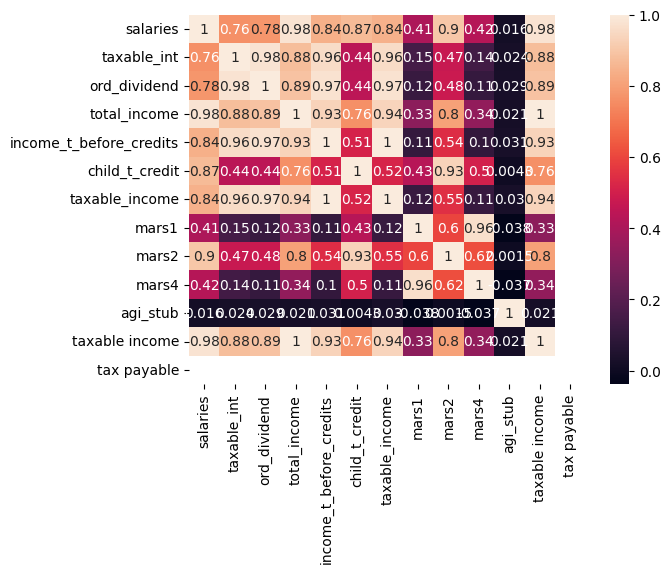

In [ ]:
sns.heatmap(tax_data.corr(), annot=True)
plt.show()

In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(tax_data), columns=tax_data.columns)
data_scaled

,salaries,taxable_int,ord_dividend,total_income,income_t_before_credits,child_t_credit,taxable_income,mars1,mars2,mars4,agi_stub,taxable income,tax payable
0,5.356102,1.966302,0.779082,4.215351,0.282192,3.304708,0.581898,22.577575,10.004917,34.673508,-1.46385,4.215351,0.0
1,8.908719,2.112252,1.040363,6.747316,1.659940,19.429492,1.766063,9.384332,13.084198,18.088186,-0.87831,6.747316,0.0
2,7.562373,2.099424,1.343212,6.092847,2.425709,11.525804,2.464590,3.520616,12.444211,4.880848,-0.29277,6.092847,0.0
3,6.636355,1.891707,1.381060,5.447397,2.598910,10.188331,2.607006,1.216527,10.908942,1.462444,0.29277,5.447397,0.0
4,12.406920,4.324941,4.069700,10.490324,6.929741,13.621662,6.884475,0.853242,15.425570,0.808501,0.87831,10.490324,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166681,0.057090,-0.007804,-0.006900,0.036362,-0.006631,0.016755,-0.004492,0.117755,0.067636,0.088153,-0.87831,0.036362,0.0
166682,0.057038,-0.007310,-0.004205,0.040147,0.006540,0.002217,0.007661,0.033740,0.089493,0.008756,-0.29277,0.040147,0.0
166683,0.058119,-0.007249,-0.005107,0.040698,0.014421,0.037350,0.014652,-0.001462,0.089493,-0.018672,0.29277,0.040698,0.0
166684,0.129189,0.051279,0.063326,0.117588,0.080085,0.112462,0.081557,-0.012727,0.165557,-0.021559,0.87831,0.117588,0.0


In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(tax_data), columns=tax_data.columns)

X = data_scaled.drop("tax payable", axis = 1)
y = data_scaled["tax payable"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state= 42)

'''feature selection (e.g., using correlation analysis)....'''




"# Perform feature selection (e.g., using correlation analysis)\ncorr_matrix = X_train.corr()\nimportant_features = corr_matrix['tax payable'].sort_values(ascending=False)[:5].index.tolist()\nX_train = X_train[important_features]\nX_test = X_test[important_features]\nprint(important_features)"

In [ ]:
models = [LinearRegression(), RandomForestRegressor()]
names = ["Linear Regression", "Random Forest"]


def evaluate_model(model, X, y):
    mse = -cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error").mean()
    r2 = cross_val_score(model, X, y, cv=5, scoring="r2").mean()
    return mse, r2
for i in range(len(models)):
    mse, r2 = evaluate_model(models[i], X_train, y_train)
    print(f"{names[i]}: MSE = {mse:.2f}, R2 = {r2:.2f}")

Linear Regression: MSE = -0.00, R2 = 1.00
Random Forest: MSE = -0.00, R2 = 1.00


In [ ]:
model = RandomForestRegressor()
params = {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10], "min_samples_split": [2, 4, 6]}
grid = GridSearchCV(model, params, cv=5, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

model = grid.best_estimator_

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"R2 score: {r2:.2f}")

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
0.0
Mean squared error: 0.00
R2 score: 1.00
